# TD2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import beta

## Exo 1


In [2]:
# 1. Vérification que f_Δ est une fonction de densité


# Densité triangulaire définie par morceaux
# Cette fonction ne fait rien dans le code, mais sert juste de
# rappel de la fonction dont on se sert
def f_triangular(x):
    if 0 <= x <= 1:
        return x
    elif 1 < x <= 2:
        return 2 - x
    else:
        return 0


# Intégration de f(x) manuellement pour vérifier que l'intégrale est égale à 1
def integrate_f_triangular():
    # Intégrale sur [0, 1] de f(x) = x
    integral_1 = (1**2) / 2 - (0**2) / 2

    # Intégrale sur [1, 2] de f(x) = 2 - x
    integral_2 = (2 * 2 - 2**2 / 2) - (2 * 1 - 1**2 / 2)

    return integral_1 + integral_2


# Résultat de l'intégrale
integral_result = integrate_f_triangular()

# Affichage du résultat
print(
    f"L'intégrale de f(x) sur [0, 2] est : {integral_result}\nElle est donc positive et égale à 1, c'est une fonction de densité "
)

L'intégrale de f(x) sur [0, 2] est : 1.0
Elle est donc positive et égale à 1, c'est une fonction de densité 


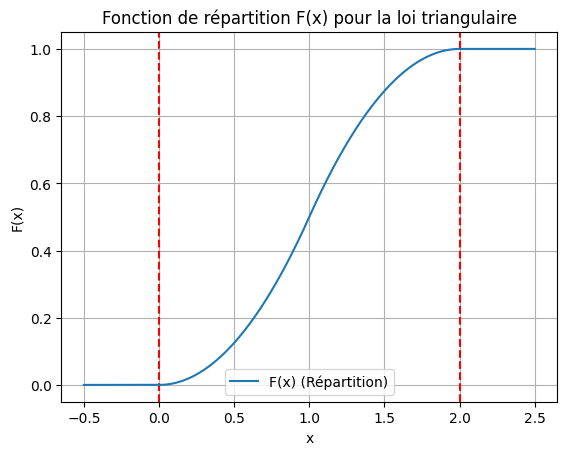

F(0) = 0
F(1) = 0.5
F(2) = 1.0


In [3]:
# 2. Fonction de répartition F_Δ(x)


def F_triangular(x):
    if x <= 0:
        return 0
    elif 0 < x <= 1:
        return (x**2) / 2
    elif 1 < x <= 2:
        return (0.5) + 2 * (x - 1) - (x**2) / 2 + 0.5
    else:
        return 1


# Génération de points pour visualiser la fonction de répartition
x_vals = np.linspace(-0.5, 2.5, 1000)
F_vals = [F_triangular(x) for x in x_vals]

# Tracé de la fonction de répartition
plt.axvline(x=0, color="red", ls="--")
plt.axvline(x=2, color="red", ls="--")
plt.plot(x_vals, F_vals, label="F(x) (Répartition)")
plt.title("Fonction de répartition F(x) pour la loi triangulaire")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.show()

# Affichage des exemples pour x = 0, 1, 2
print(f"F(0) = {F_triangular(0)}")
print(f"F(1) = {F_triangular(1)}")
print(f"F(2) = {F_triangular(2)}")

In [4]:
# 3. Vérification que F_Δ(x) est une fonction de répartition

# Vérification des limites
F_at_negative_infinity = F_triangular(-1000)  # Valeur très négative
F_at_positive_infinity = F_triangular(1000)  # Valeur très positive


# Vérification de la croissance (en comparant les valeurs de F(x) pour x croissants)
def is_increasing(F_func, x_values):
    return all(
        F_func(x_values[i]) <= F_func(x_values[i + 1]) for i in range(len(x_values) - 1)
    )


x_test_values = np.linspace(0, 2, 100)
increasing_check = is_increasing(F_triangular, x_test_values)

# Vérification des valeurs aux bornes
F_at_0 = F_triangular(0)
F_at_2 = F_triangular(2)

# Affichage des résultats
print(f"Limite à gauche : F(-∞) = {F_at_negative_infinity} (doit être 0)")
print(f"Limite à droite : F(+∞) = {F_at_positive_infinity} (doit être 1)")
print(f"F(x) est croissante sur [0, 2] : {increasing_check}")
print(f"Vérification F(0) = 0 : {F_at_0}")
print(f"Vérification F(2) = 1 : {F_at_2}")

Limite à gauche : F(-∞) = 0 (doit être 0)
Limite à droite : F(+∞) = 1 (doit être 1)
F(x) est croissante sur [0, 2] : True
Vérification F(0) = 0 : 0
Vérification F(2) = 1 : 1.0


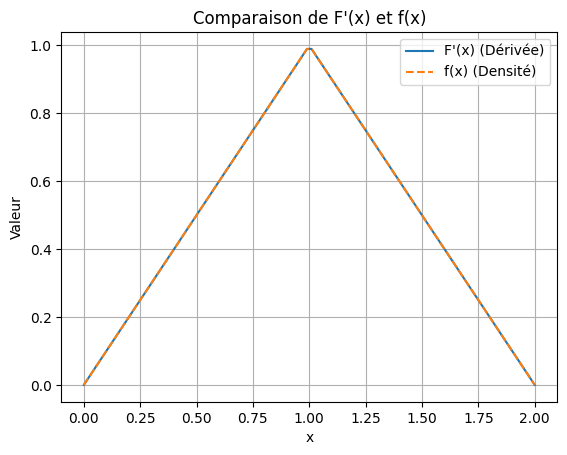

F'(0) = 0
f(0) = 0

F'(0.5) = 0.5
f(0.5) = 0.5

F'(1) = 1
f(1) = 1

F'(1.5) = 0.5
f(1.5) = 0.5

F'(2) = 0
f(2) = 0



In [5]:
# 4. Dérivée de F(x) et vérification qu'elle coïncide avec f(x)

# Dérivée de F(x), qui doit correspondre à f(x)
def F_prime_triangular(x):
    if x <= 0:
        return 0
    elif 0 < x <= 1:
        return x  # Dérivée de x^2 / 2 est x
    elif 1 < x <= 2:
        return 2 - x  # Dérivée de 2(x - 1) - x^2 / 2
    else:
        return 0



# Vérification que F'(x) = f(x) pour quelques points
x_test_values = np.linspace(0, 2, 100)
F_prime_vals = [F_prime_triangular(x) for x in x_test_values]
f_vals = [f_triangular(x) for x in x_test_values]

# Tracé de la dérivée F'(x) et de f(x) pour comparaison
plt.plot(x_test_values, F_prime_vals, label="F'(x) (Dérivée)")
plt.plot(x_test_values, f_vals, label="f(x) (Densité)", linestyle="--")
plt.title("Comparaison de F'(x) et f(x)")
plt.xlabel("x")
plt.ylabel("Valeur")
plt.grid(True)
plt.legend()
plt.show()

# Vérification des valeurs pour quelques points clés
for x in [0, 0.5, 1, 1.5, 2]:
    print(f"F'({x}) = {F_prime_triangular(x)}\nf({x}) = {f_triangular(x)}\n")

## Exo 2


Q1.

Sans biais si l'esperance d'un estimateur = densité
Calculer esp(Fn(x))

Q2.

Erreur dans TD: montrer que n\*Fn(x) suit une loi binomiale


## Exo 3


## Exo 4


## Exo 5


In [6]:
# Loi de référence : une distribution Beta(2, 5)
def true_density(x):
    """Densité réelle (loi bêta Beta(2, 5))."""
    return beta.pdf(x, 2, 5)

# Fonction pour générer n données selon une loi bêta
def generate_data(n):
    return np.random.beta(2, 5, n)

# Fonction pour estimer la densité
def estimate_density(data, x_vals, bandwidth):
    """Estime la densité à l'aide d'une estimation par noyau."""
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(data[:, np.newaxis])  # On ajuste l'estimation
    log_density = kde.score_samples(x_vals[:, np.newaxis])  # Calcul des log-densités
    return np.exp(log_density)  # Retourner la densité estimée

# Fonction pour calculer l'erreur
def compute_error(true_density, estimated_density, x_vals):
    """Calcule l'erreur quadratique moyenne entre la vraie densité et l'estimation."""
    mse = np.mean((true_density(x_vals) - estimated_density)**2)
    return mse

In [7]:
# Fonction pour effectuer la simulation Monte Carlo
def monte_carlo_simulation(n, B, bandwidth, x_vals):
    """Effectue l'expérience de Monte Carlo B fois et retourne l'erreur moyenne."""
    errors = []
    
    for _ in range(B):
        # Simuler les données
        data = generate_data(n)
        
        # Estimer la densité
        estimated_density = estimate_density(data, x_vals, bandwidth)
        
        # Calculer l'erreur
        error = compute_error(true_density, estimated_density, x_vals)
        errors.append(error)
    
    return np.mean(errors)  # Retourner l'erreur moyenne sur les B itérations

In [8]:
# Grille des valeurs de n
n_values = [50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]
B = 100  # Nombre d'itérations Monte Carlo
h = 0.05  # Choix du paramètre de lissage
x_vals = np.linspace(0, 1, 1000)  # Grille des valeurs de x dans [0, 1]

# Effectuer les simulations pour chaque n
errors_n = []

for n in n_values:
    avg_error = monte_carlo_simulation(n, B, h, x_vals)
    errors_n.append(avg_error)

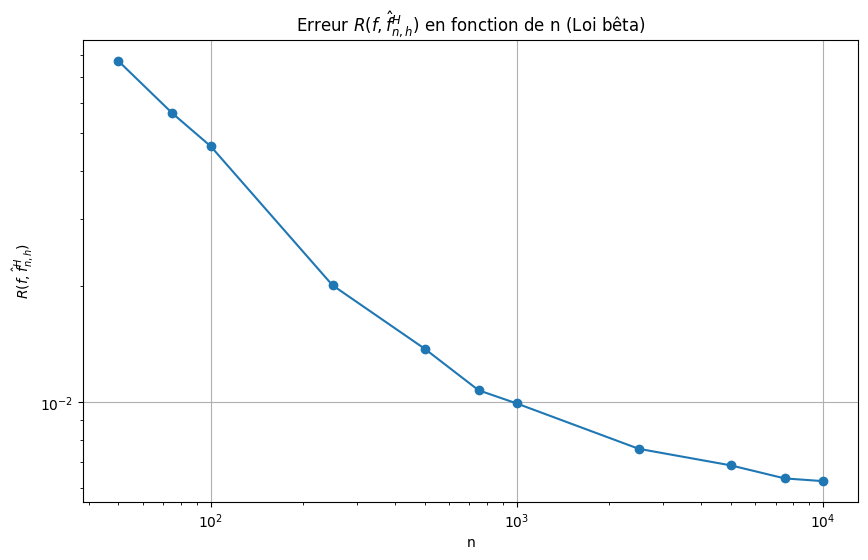

In [9]:
# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_n, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.title(r"Erreur $R(f, \hat{f}^H_{n,h})$ en fonction de n (Loi bêta)")
plt.xlabel("n")
plt.ylabel(r"$R(f, \hat{f}^H_{n,h})$")
plt.grid(True)
plt.show()

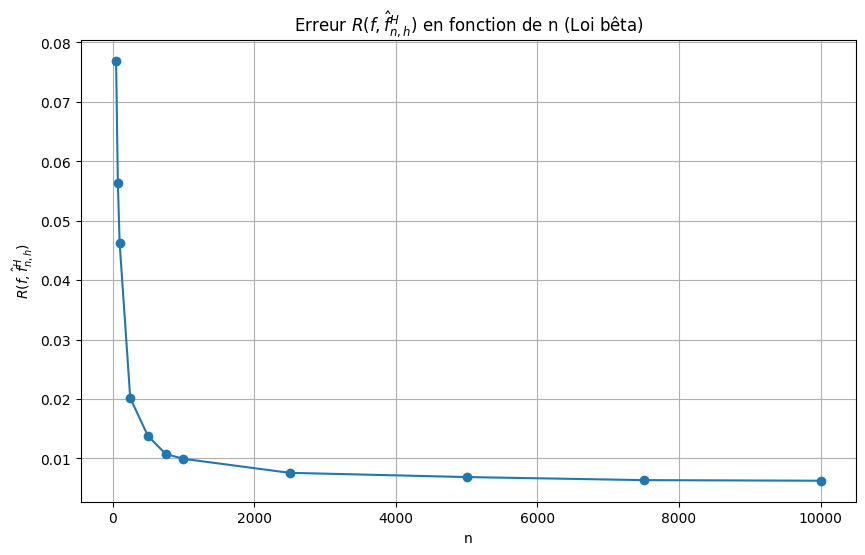

In [10]:
# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_n, marker="o")
plt.title(r"Erreur $R(f, \hat{f}^H_{n,h})$ en fonction de n (Loi bêta)")
plt.xlabel("n")
plt.ylabel(r"$R(f, \hat{f}^H_{n,h})$")
plt.grid(True)
plt.show()

In [11]:
xs = n_values
ys = errors_n

log_xs = np.log(xs)
log_ys = np.log(ys)

pentes = [(log_ys[i+1]-log_ys[i])/(log_xs[i+1]-log_xs[i]) for i in range(len(xs)-1)]

print(f"Pentes : {pentes}")

print(f"Moy pentes : {np.mean(pentes)}")




Pentes : [np.float64(-0.7698027773246561), np.float64(-0.6834586422792391), np.float64(-0.9072899243735753), np.float64(-0.5476478976473897), np.float64(-0.6124946220842731), np.float64(-0.274403760955777), np.float64(-0.29558005319750763), np.float64(-0.14306536218513172), np.float64(-0.1923849577713547), np.float64(-0.05602108628881006)]
Moy pentes : -0.44821490841077144


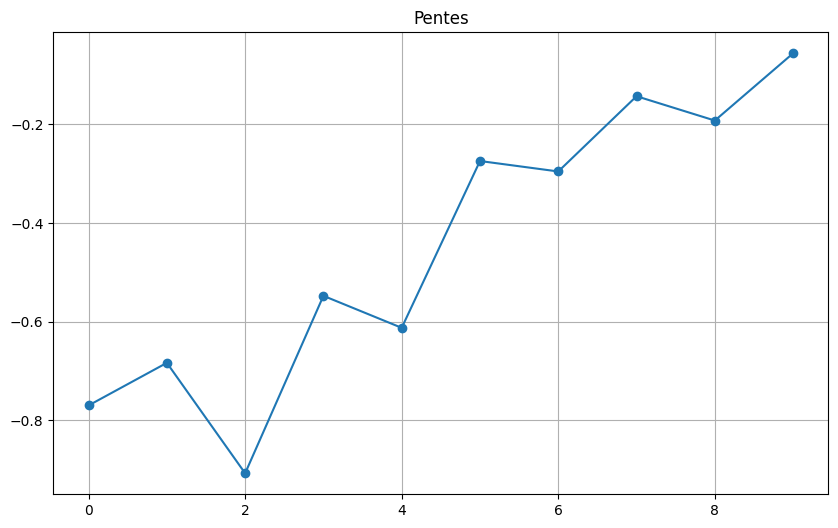

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(pentes, marker="o")
plt.title("Pentes")
plt.grid(True)
plt.show()